In [1]:
# Импортируем библиотеки
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LinearRegression

# Ансамблирование: блендинг и стекинг

> **Стекинг (stacking)** — алгоритм построения ансамбля, в котором параллельно и независимо друг от друга обучаются несколько базовых моделей (необязательно одной природы), а их предсказания используются для обучения метамодели (финальная модель) как факторы.

Предсказания базовых алгоритмов называются **метапризнаками.**

## БЛЕНДИНГ

Простейшая реализация стекинга заключается в **блендинге** (blending). 

Схематично блендинг можно представить следующим образом:

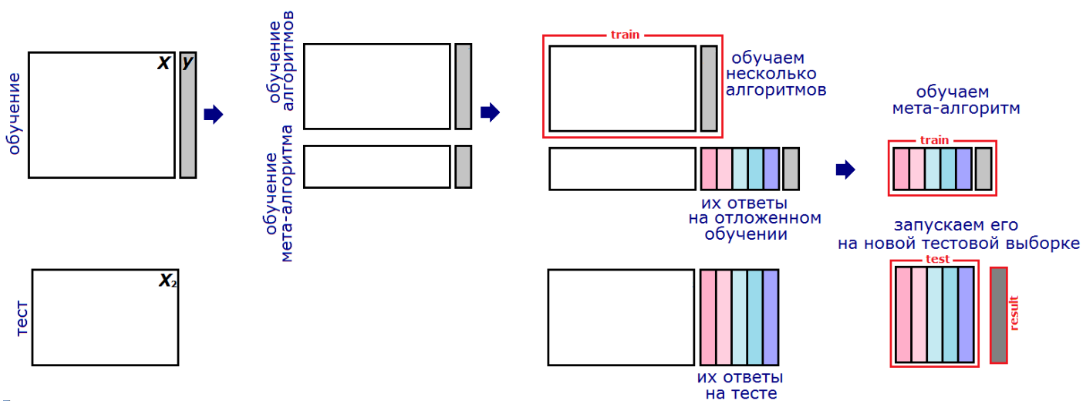

Суть блендинга состоит в следующем: предположим у нас есть обучающая выборка ***X***, которую мы делим пополам. Первая часть используется для обучения базовых моделей, а на второй базовые модели делают предсказания – **метапризнаки**, на которых уже и обучается в дальнейшем метамодель.

> **Недостатки блендинга** видны невооруженным глазом: ни базовые модели, ни метамодель не обучаются на полных данных. 

## СТЕКИНГ

Для решения этой проблемы используется усовершенствованная модель блендинга, которая имеет полноценное название — **стекинг**. Идея борьбы с недостатком блендинга — использование **кросс-валидации**.

Рассмотрим как обучается классический стекинг. Пусть у нас есть таблица с примерами X и ответами на них y. Количество признаков — ***m***, количество наблюдений — ***n***, количество моделей в стекинге — ***K***.

1. Обучающая выборка разбивается на ***L*** равных частей, называемых **фолдами**. Например, для трёх фолдов (***L = 3***) схематично это будет выглядеть следующим образом:

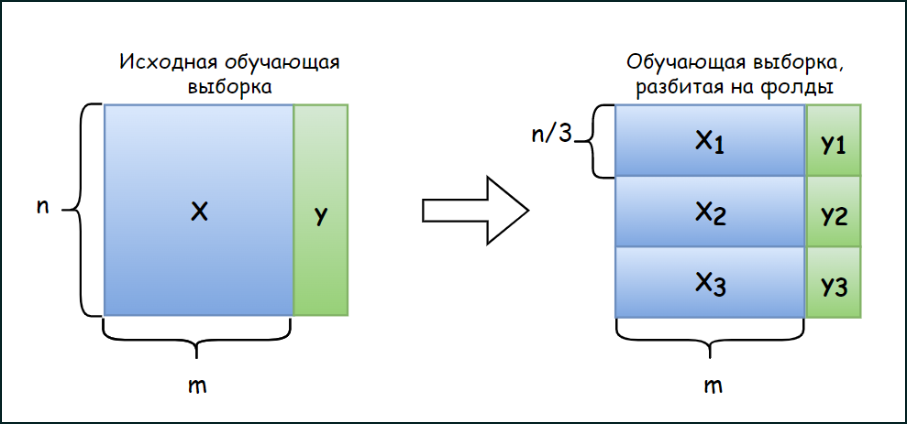

2. Затем для каждой базовой модели эти фолды перебираются следующим образом: на каждом шаге фиксируются **L - 1*** фолдов для обучения базовых моделей и один фолд для предсказания (в случае бинарной классификации каждая модель предсказывает вероятность принадлежности к классу 1, в случае мультиклассовой классификации — к каждому классу). В результате будет сформировано ***L*** предсказаний, из которых формируется метапризнак ***Mj***, где ***j*** — номер модели:

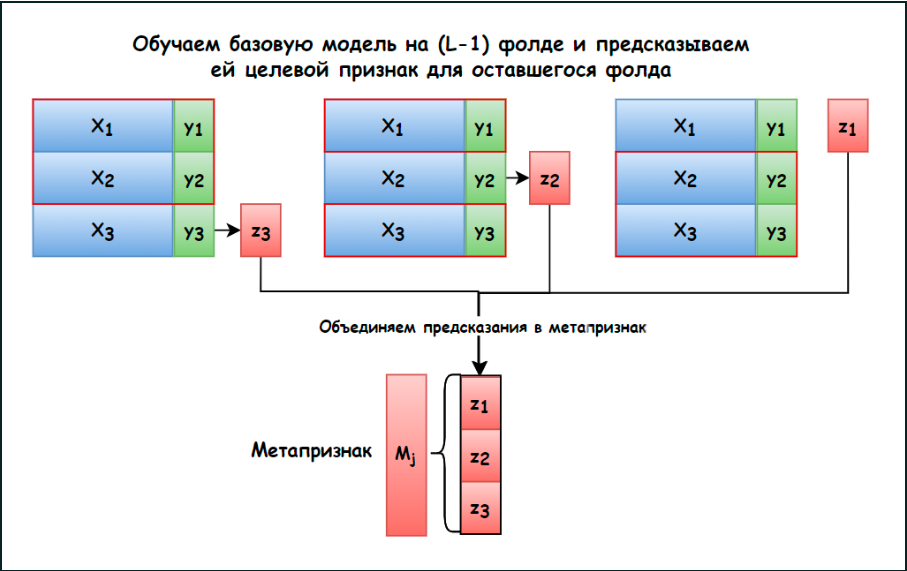

Такой подход к формированию метапризнаков позволяет избежать переобучения. Действительно, можно рассматривать ***L-1*** - фолд как обучающую выборку, а оставшийся — как тестовую. Таким образом, мы обучаемся на тренировочной выборке, но предсказания делаем для той выборки, которую ещё не видели.

3. После того как мы проделаем шаг 2 для всех базовых моделей, мы получим новый набор данных, состоящий из ***K*** метапризнаков — предсказаний каждой из моделей. Предсказания моделей будут использоваться в качестве метапризнаков, на которых будет обучена метамодель.

Пусть мы взяли три разных модели, т.е. ***K=3*** . Это будет выглядеть следующим образом:

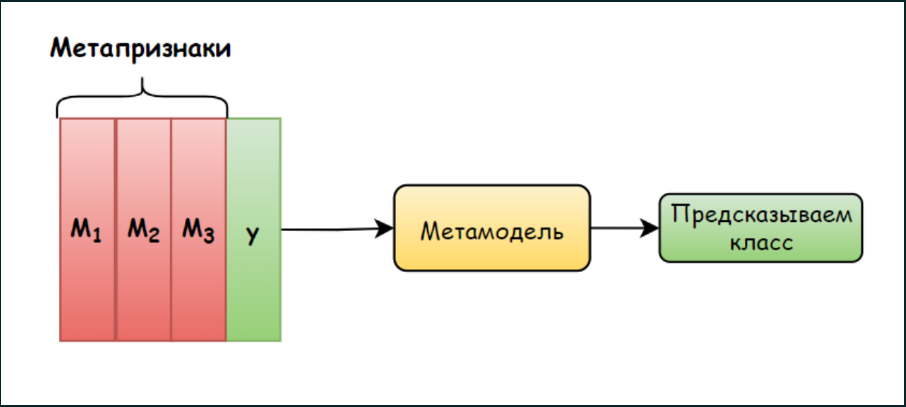

> **Примечание**. Кроме метафакторов, метамодель может использовать для своего обучения изначальные признаки из исходного набора данных.

Давайте посмотрим, как работает алгоритм на конкретной таблице. Пусть у нас есть некоторый набор данных из четырёх признаков, характеризующих клиента (x_0, x_1, x_2 и x_3), и восемь наблюдений. На основе этих признаков необходимо предсказать бинарный целевой признак (y) покупки товара со значениями 1 (купил) и 0 (не купил). Будем использовать стекинг, состоящий из трёх различных моделей.

Разбиваем выборку на четыре фолда, то есть в каждом фолде будет по две строки таблицы (обозначены цветом). Обучаем каждую модель на трёх из этих фолдов и делаем предсказание вероятности покупки для оставшегося.

Из предсказаний будет сформировано три метапризнака (по одному на каждую базовую модель). Это будут предсказанные базовыми классификаторами вероятности покупки (вероятность принадлежности к классу 1).

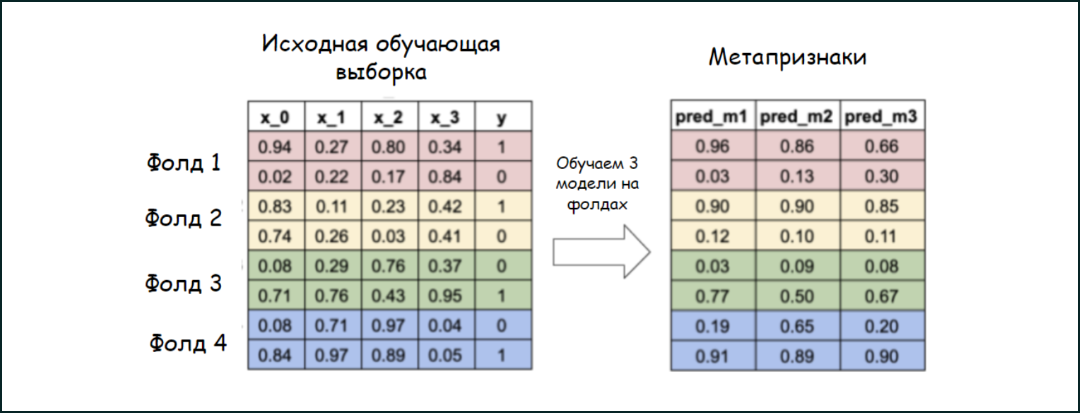

Формируем новый набор данных и отправляем его в метамодель, которая уже и делает финальное предсказание целевого признака покупки:

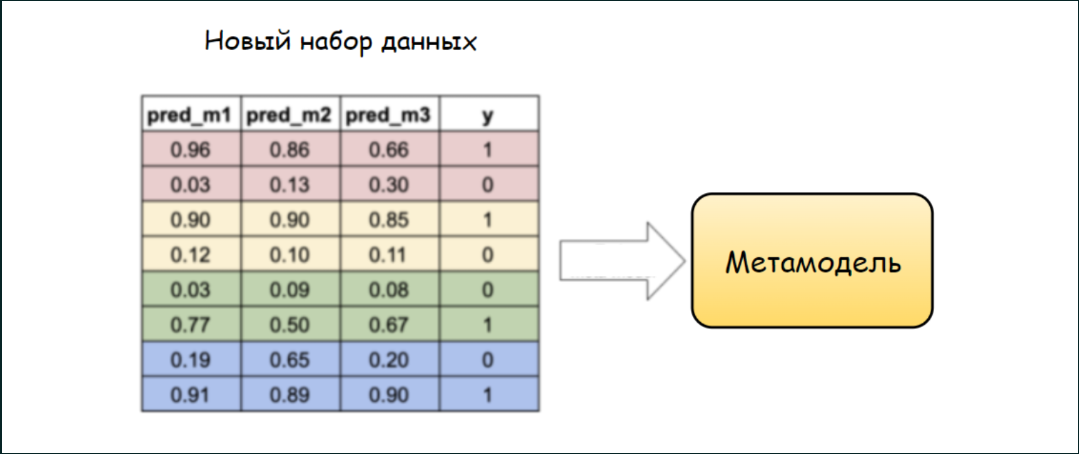

Метамодель будет производить поиск зависимостей в данных и принимать решение уже на основе предсказанных вероятностей покупки, которые были получены на первом этапе. 

В общем случае, когда у нас есть ***K*** моделей, общая схема стекинга будет иметь вид:

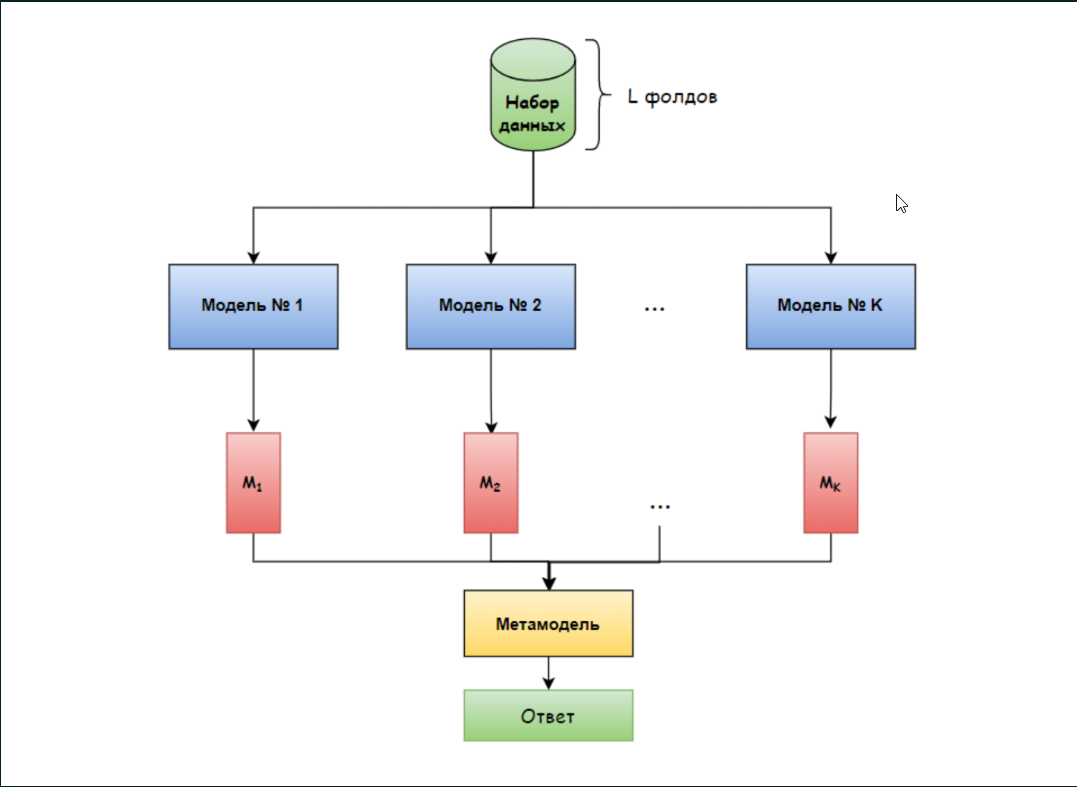

> Важно понимать, стекинг — это чистая эвристика, эффективность которой доказана только практическим применением. Стекинг использует тот же подход, что и нейронные сети: предсказания предыдущего этапа (слоя) используются в качестве признаков для следующего этапа (слоя).

> С точки зрения смещения и разброса, стекинг не имеет прямой математической интерпретации, так как не минимизирует напрямую ни ту, ни другую компоненту ошибки. Удачно работающий стекинг просто уменьшает ошибку, но гарантий уменьшения смещения или разброса нет.

Есть некоторые **рекомендации, как правильно строить стекинг:**

- В качестве метамоделей лучше всего применять простые модели: например, для задачи регрессии — линейную регрессию, а для задачи классификации — логистическую регрессию.

- В качестве базовых моделей лучшего всего использовать модели различной природы

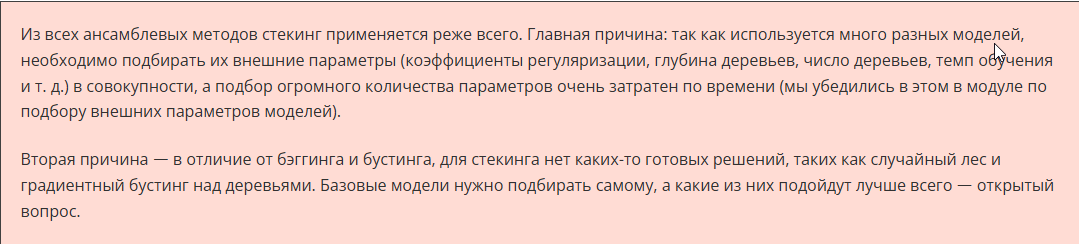

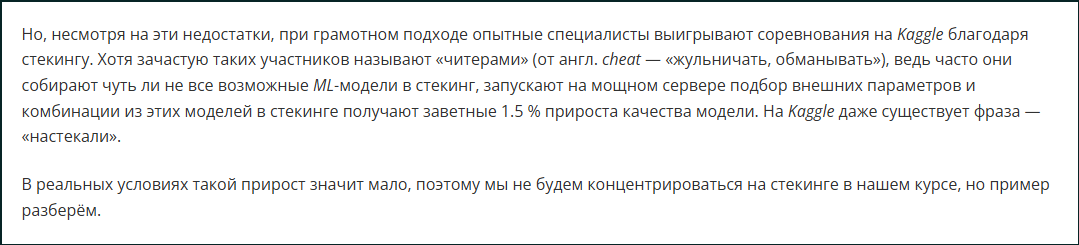

### Задание 3.1

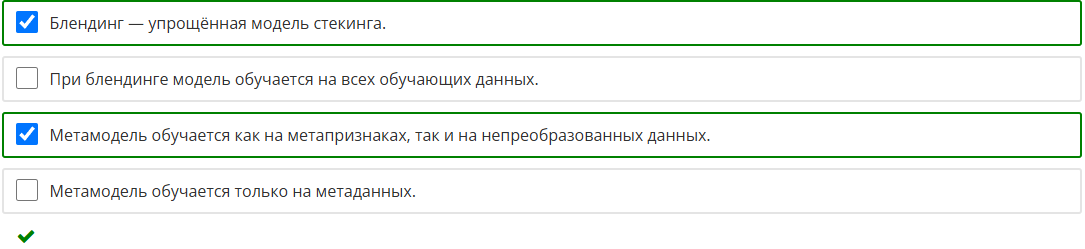

### Задание 3.2

Вы используете стекинг из 10 моделей машинного обучения и данные, разбитые на 5 фолдов, для решения задачи бинарной классификации. Все базовые модели обучаются на всех признаках исходного датасета.

Какое утверждение верно для стекинга с одним уровнем (K базовых моделей и одна метамодель)?

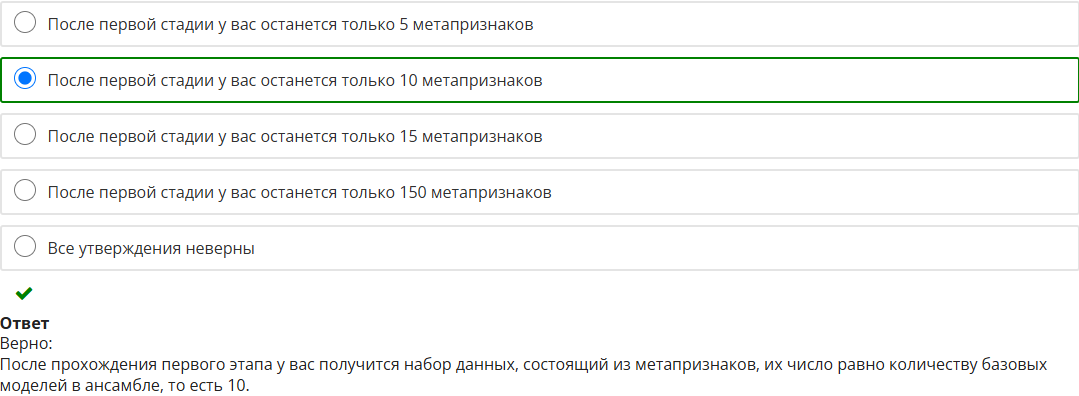

### Задание 3.3

Какие из следующих утверждений верны для стекинга?

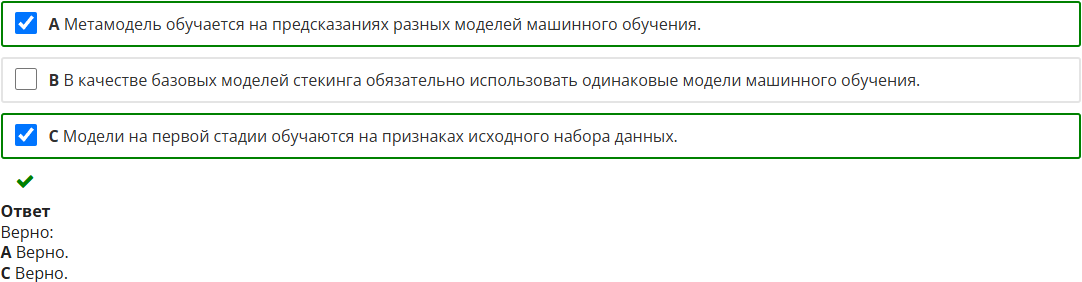

### Задание 3.4

Зачем необходимо разделять выборку на фолды при обучении базовых моделей?

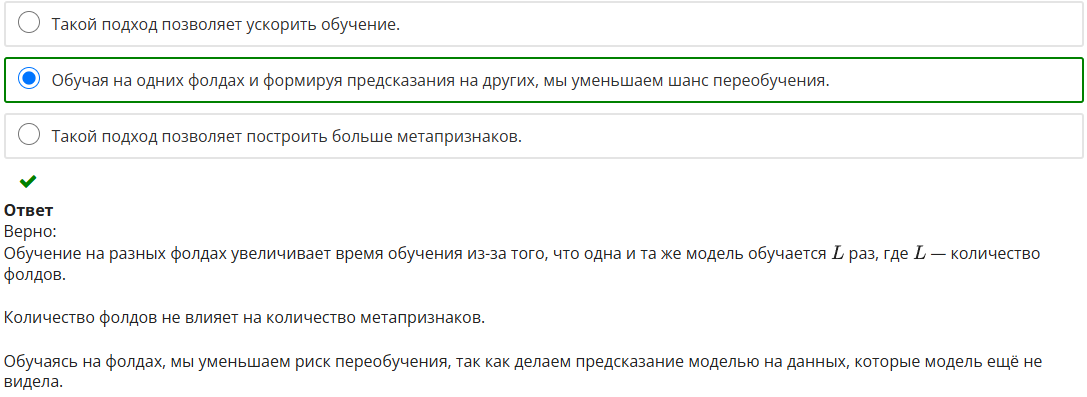

## Стекинг в SKLEARN

Стекинг для задачи регрессии имеет реализацию в библиотеке scikit-learn в классе [StackingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html), для задачи классификации — в классе [StackingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier). На вход подаётся список базовых моделей (атрибут estimators) и метамодель (атрибут final_estimator).

> **Примечание**. Стоит понимать, что для задачи регрессии все базовые модели должны быть регрессорами, а для задачи классификации — классификаторами.  

Попробуем на практике применить стекинг, используя реализацию из библиотеки *sklearn*. В качестве входных данных будем использовать данные про диабет, использованные ранее. Обратимся снова к коду и обучим модель на данных.

Как и все ансамбли, модель стекинга находится в модуле *ensemble*.

In [2]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

Основные параметры StackingRegressor:

- estimators — список из кортежей базовых моделей в виде (str, model). Первым элементом в каждом кортеже идет строка с именем модели, вторым — собственно сама модель.
- final_estimator — метамодель.
- cv — количество фолдов, на которые делится выборка. По умолчанию используется пять фолдов.

 Будем строить стекинг на следующих моделях:

- 'dt' — дерево решений;
- 'lr' — ридж-регрессия, линейная модель регрессии с L2-регуляризацией;

случайный лес с количеством деревьев, равным 10, в качестве метамодели.

> **Примечание**. В данном случае мы рассматриваем **RidgeCV**, которая представляет собой ридж-регрессию со встроенной кросс-валидацией по методу **Leave-One-Out Cross-Validation**. Подробнее читайте по [ссылке](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html).

Создадим список кортежей в формате ("*наименование модели*", модель) из этих моделей, и назовем его *estimators:*

Теперь, когда список из базовых моделей готов, создадим объект класса StackingRegressor. Первым аргументом передаём список из базовых моделей. Будем использовать в качестве метамодели модель случайного леса. Для этого передаём её в параметр final_estimator. Остальные параметры оставим по умолчанию.

Обучаем модель с помощью метода fit(), делаем предсказание классов с помощью метода predict(), а затем считаем метрики:

***См. приложение с кодом***

Посмотреть на метапризнаки можно с помощью метода **transform()**. Для этого в метод нужно передать матрицу наблюдений X. В результате вызова метода для всех объектов каждая из двух моделей сделает предсказание вероятностей и вернёт матрицу из двух столбцов. Оформим её в виде DataFrame:

***См. приложение с кодом***

↑ *Наша таблица метапризнаков, на которой происходит обучение метамодели случайного леса.*

> **Примечание**. При желании к метапризнакам можно добавить столбцы из изначального набора данных и попробовать обучить модель на этом наборе данных.

### Задание 3.5

Для выполнения задания используйте набор данных о диабете, который представлен в ноутбуке с примерами.


Постройте стекинг из следующих базовых моделей:

Ридж-регрессия (RidgeCV());
Линейная регрессия.
В качестве метамодели используйте случайный лес с количеством деревьев 100, максимальной глубиной 10, все параметры для базовых моделей стандартные. Для всех алгоритмов параметр random_state=42.


Сделайте предсказание целевой метки для тестового набора данных. Рассчитайте метрику MSE для набора данных и запишите её в качестве ответа с точностью до одного знака после запятой.

MSE на тестовой выборке:

In [3]:
# Загрузим датасет из библиотеки
data = load_diabetes(as_frame=True)
# Создаем матрицу наблюдений
X = data['frame'].drop('target', axis=1)
# Создаем вектор правильных ответов
y = data['target']
 
X.head()

# Разделим выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [4]:
estimators = [
    ('rr', RidgeCV()),
    ('lr',  LinearRegression())
]

reg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
)
#Обучаем модель
reg.fit(X_train, y_train)

StackingRegressor(estimators=[('rr', RidgeCV()), ('lr', LinearRegression())],
                  final_estimator=RandomForestRegressor(max_depth=10,
                                                        random_state=42))

In [5]:
y_pred_stack = reg.predict(X_test)
print(f'Качество предсказания по MSE для стекинга {round(mean_squared_error(y_test, y_pred_stack),1)}')

Качество предсказания по MSE для стекинга 3534.7


In [6]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error)

<function mean_squared_error at 0x00000271F84925C0>


In [7]:
from sklearn.metrics import mean_squared_error

y_hat = [3, -0.5, 2, 7]
y = [2.5, 0.0, 2, 8]

print(mean_squared_error(y_hat, y))

0.375
